In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

C:\Users\cknox\AppData\Local\Temp\ipykernel_29328\2642155502.py:40: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=data_full, x = 'ssp', y='ratio', palette = 'viridis', size = 1.5)
C:\Users\cknox\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cknox\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Ratio of Non-Staple to Staple Food Demand')

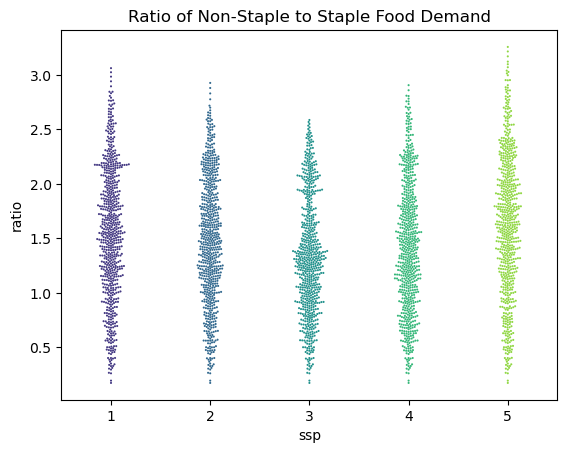

In [27]:
#load in datasets
ssp1 = pd.read_csv("ssp1_food_con.csv")
ssp2 = pd.read_csv("ssp2_food_con.csv")
ssp3 = pd.read_csv("ssp3_food_con.csv")
ssp4 = pd.read_csv("ssp4_food_con.csv")
ssp5 = pd.read_csv("ssp5_food_con.csv")



def make_new_df(df, ssp):
    df_nonstaple = df[df['sector'] == 'FoodDemand_NonStaples']
    df_staple = df[df['sector'] == 'FoodDemand_Staples']
    df_nonstaple = df_nonstaple.sort_values(by=["year", "region"])
    df_staple = df_staple.sort_values(by=["year", "region"])
    df_staple = df_staple.rename(columns = {"value": "staple"})
    df_nonstaple = df_nonstaple.rename(columns = {"value": "nonstaple"})
    df_staple = df_staple.drop('rundate', axis = 1)
    #df_wide = pd.concat([df_staple, df_nonstaple["nonstaple"]], axis = 1)
    #print(df_wide)
    merged = pd.merge(df_staple, df_nonstaple, how = "outer", on = ["region", "year"])
    merged["ratio"] = merged["nonstaple"] / merged["staple"]
    merged['ssp'] = ssp

    return merged

ssp1_merged = make_new_df(ssp1,1)

ssp2_merged = make_new_df(ssp2,2)

ssp3_merged = make_new_df(ssp3,3)

ssp4_merged = make_new_df(ssp4,4)

ssp5_merged = make_new_df(ssp5,5)


data_full = pd.concat([ssp1_merged, ssp2_merged, ssp3_merged, ssp4_merged, ssp5_merged], axis =0)


sns.swarmplot(data=data_full, x = 'ssp', y='ratio', palette = 'viridis', size = 1.5)
plt.title("Ratio of Non-Staple to Staple Food Demand")
